# The Quantum Mechanical Wave Function

#### Name:

#### Total Points: --/100 pts

In [ ]:
### UNCOMMENT AND RUN THIS CELL IF USING GOOGLE COLAB
# !pip install ipympl -q
# from google.colab import output
# output.enable_custom_widget_manager()


In this notebook, we want to introduce the Schrodinger equation, the quanum mechanical equivalent of newton's law of motion $F = ma$.  Why would we want to do this?

In the first notebook, we used the Hydrogen wavefunction to calculate the potential energy that an electron would feel when it was displaced from it's equilibrium position.  What we did not do was calculate the dynamics of the wavefunction itself.  Instead, througout the course we simply assumed there is some atomic polarization resulting from the displacing the charge distribution with an electric field.  We never actually *calculated* it though.   We just assumed we could expand it using a Taylor series and used measured values of the expansion from a table.  

But what if we wanted to calculate the polarization from first principles?  We would need some equation that tells us how the wavefunction changes when it's perturbed by an electric field.  Schrodinger provided the equation, which we'll get to in a bit.


To understand the Schrodinger equation, we first need to get comfortable with the concept of a wave function. Let's return to the concrete example of a wavefunction in the first notebook, when we looked at the charge distribution of the electron in a Hydrogen atom.   Here's the Hydrogen 1s state again:

$$
\begin{align}
\psi(r)=\frac{1}{\sqrt{\pi}a_0^{3/2}}e^{-r/a_0}
\end{align}
$$

This simply tells us the electron cloud's density as a function of $r$.  Actually, it's *square* that does this, since the the radial charge distribution is $\rho(r)$ is proportional to the square of the wavefunction:

$$
\rho(r) = e|\psi(r)|^2=\frac{e}{\pi a_0^3}e^{-2r/a_0}
$$

Let's plot this wavefunction again to remind ourselves what it looks like:
  

In [1]:
#Import python packages we'll use
import numpy as np  #import NumPy package.  Did you know Travis Oliphant, former BYU ECE faculty, wrote NumPy? 
from scipy.constants import *  #get physical constants like pi and c
import matplotlib as mpl  #plotting package
import matplotlib.pyplot as plt
import ipywidgets as ipw
%matplotlib widget

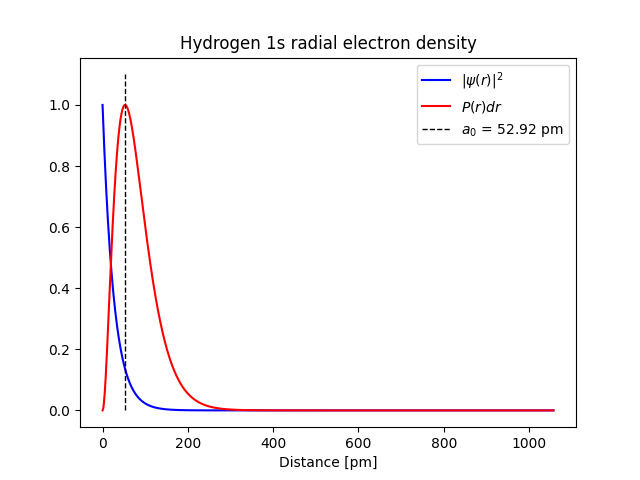

In [2]:
#set up equations for quantum mechanical electron distribution 
a0 = physical_constants["Bohr radius"][0]  #get Bohr radius from scipy 
r0 = 1e-5*a0 #set min radial coordinate.  A little more than 0 to avoid dividing by zero
rf = 20*a0 #set max radial coordinate
N=1000 #number of points in r array
dr = (rf - r0)/(N) #dr step size
r = np.arange(r0,rf,dr) #radial coordinate array
Z = 1 # atomic number 
psi_100 = 1/np.sqrt(pi)*(Z/a0)**(3/2)*np.exp(-Z*np.abs(r)/a0) #electron density wavefunction
P_100 = 4*pi*r**2*np.abs(psi_100)**2*dr # radial probability distribution


# plot quantum mechanical electron distribution 
fig, ax = plt.subplots()

ax.plot(r/1e-12,psi_100**2/np.max(psi_100**2),label=r'$|\psi(r)|^2$', color='blue') #plot electron density as a function of radial coordinate
ax.plot(r/1e-12,P_100/np.max(P_100), label = r'$P(r)dr$', color='red') #plot radial distribution function
ax.vlines(a0/1e-12, 0, 1.1, colors='k', linestyles='dashed', linewidth=1, label=r'$a_0$ = {:.2f} pm'.format(a0/1e-12))

plt.title(r'Hydrogen 1s radial electron density')
plt.xlabel('Distance [pm]')
plt.legend()
plt.show()

## Time Dependence of the Wave Function

But why is it called a *wave* function--after all it appears to just be describing a stationary charge distribution.  Well, we've actually left out the time dependence, but we'll put it it back in now.  Every quantum state that has a single definite energy, like single-electron atomic orbitals, evolves in time like this:

$$
\begin{align}
\Psi(r,t) = \psi(r)e^{\frac{-j}{\hbar}E_n t}
\end{align}
$$

where $E_n$ is the energy of the state.  In the first notebook, we used the wave function to calculate the total potential energy of the 1s electron to be -13.6 V.

Interestingly, the time dependence of a wavefunction with definite energy does *not* affect the observed charge density distribution, since

$$
\begin{align}
|\Psi(r,t)|^2 = |\psi(r)e^{\frac{-j}{\hbar}E_n t}|^2 = |\psi(r)|^2 
\end{align}
$$

For this reason, wavefunctions with definite energy are called stationary states.  They are stationary in the observables (e.g. charge distribution), even though the wave function itself is not stationary in time.  The stationary states of a system are extremely useful, since any other state can be expressed as a superposition of these state.  It is analogous to building up an optical pulse using sinusoids with definite frequencies.  

Let's see this in action for atomic state, consider an electron in the superposition of being in the 1s state and the 2s state:

$$
\begin{align}
\Psi(r,t) = \frac{\psi_{100}e^{\frac{-j}{\hbar}E_1 t} + \psi_{200}e^{\frac{-j}{\hbar}E_2 t}}{\sqrt{2}}
\end{align}
$$

Both the 1s state and 2s states will have their own time dependence, but the superpostion will take into account both.  Here's a plot of the charge distributions of both states and their superpostion at $t=0$:

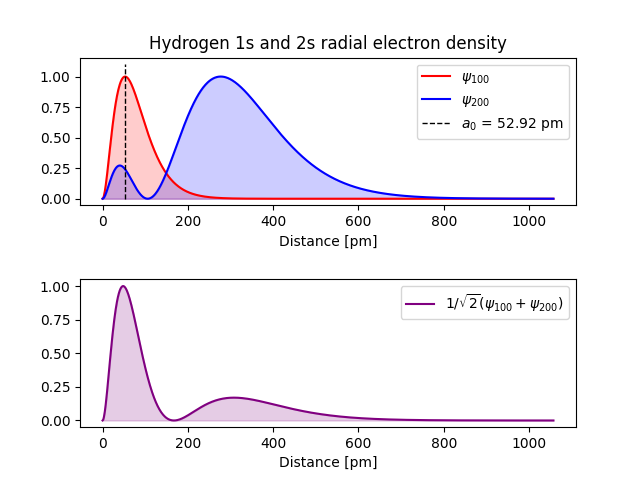

In [3]:
psi_200 = 1/(4*np.sqrt(2*pi)*a0**(3/2))*(2-r/a0)*np.exp(-Z*np.abs(r)/(2*a0)) #electron density wavefunction
P_200 = 4*pi*r**2*np.abs(psi_200)**2*dr # radial probability distribution

psi = 1/np.sqrt(2)*(psi_100 + psi_200) # superposition state
P = 4*pi*r**2*np.abs(psi)**2*dr # radial probability distribution

fig, (ax1,ax2) = plt.subplots(2)

#ax.plot(r/1e-12,psi_100**2/np.max(psi_100**2),label=r'$|\psi(r)|^2$', color='blue') #plot electron density as a function of radial coordinate
ax1.plot(r/1e-12,P_100/np.max(P_100), label = r'$\psi_{100}$', color='red') #plot radial distribution function
ax1.fill_between(r/1e-12, P_100/np.max(P_100), color = 'red', alpha = 0.2)


#ax.plot(r/1e-12,psi_200**2/np.max(psi_200**2),label=r'$|\psi(r)|^2$', color='blue') #plot electron density as a function of radial coordinate
ax1.plot(r/1e-12,P_200/np.max(P_200), label = r'$\psi_{200}$', color='blue') #plot radial distribution function
ax1.fill_between(r/1e-12, P_200/np.max(P_200), color = 'blue', alpha = 0.2)

ax1.vlines(a0/1e-12, 0, 1.1, colors='k', linestyles='dashed', linewidth=1, label=r'$a_0$ = {:.2f} pm'.format(a0/1e-12))

ax1.set_title(r'Hydrogen 1s and 2s radial electron density')
ax1.set_xlabel('Distance [pm]')
ax1.legend()


ax2.plot(r/1e-12,P/np.max(P), label = r'$1/\sqrt{2}(\psi_{100} + \psi_{200})$', color='purple') #plot radial distribution function
ax2.fill_between(r/1e-12, P/np.max(P), color = 'purple', alpha = 0.2)
ax2.set_xlabel('Distance [pm]')
ax2.legend()

fig.subplots_adjust(hspace=.5)
plt.show()

Now let's watch what happens to the charge distribution as we let the state evolve in time:

interactive(children=(FloatSlider(value=0.0, description='t', max=1.8479956785822313, step=0.01847995678582231…

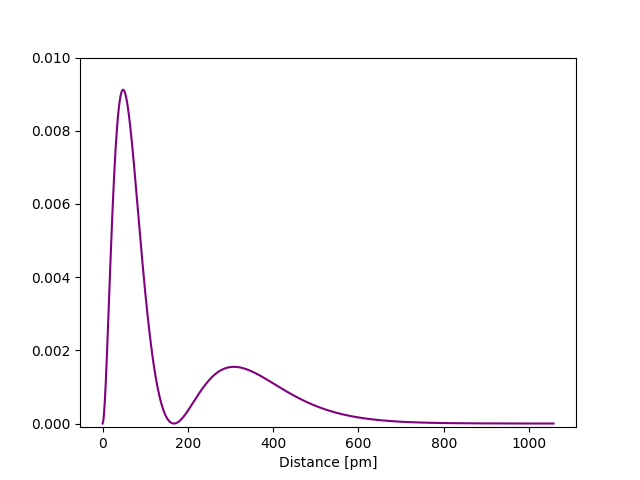

In [4]:
omega1 = 13.6  # energy of first state divided by hbar = 1
omega2 = 13.6/4 # energy of second state divided by hbar = 1
T1 = 2*pi/omega2 #period of slower oscillation

def update(t = 0):
    psi = 1/np.sqrt(2)*(psi_100*np.exp(-1j*omega1*t) + psi_200*np.exp(-1j*omega2*t)) # superposition state
    P = 4*pi*r**2*np.abs(psi)**2*dr # radial probability distribution
    line0.set_ydata(P)
    
fig, ax = plt.subplots()
dummy_psi = np.zeros_like(psi)
line0, = ax.plot(r/1e-12, dummy_psi, label = 'Wavefunction', color = 'purple')


ax.set_xlabel('Distance [pm]')
ax.set_ylim(-1e-4, 1e-2)

ipw.interact(update, t = (0, T1, 0.01*T1))

#plt.plot(z,I2)
plt.show() 

It's alive!  Even though the charge distribution of each of the individual wavefunctions is stationary, the charge distribution of their superposition is *not* stationary.  In general, we can write down any state as the superposition of stationary states and track the time evolution of the state in this way.

## Schrodinger's Equation

In 1925, Erwin Schrodinger wrote down an equation that captured this concept.  Here it is:

$$
\begin{align}
\frac{\partial |\psi \rangle}{\partial t} = \frac{-j}{\hbar}\hat{H} | \psi \rangle
\end{align}
$$

This equation says that you can obtain the time rate of change of the wavefunction simply by applying the $H$ operater on the wavefunction and then multiplying by $-j/ \hbar$.  But what is $\hat{H}$?  It's called the Hamiltonian, and when applied to stationary states it simply multiplies it by the standing wave energy.  For example, the ground state energy of the 1s state of the electron in Hydrogen is a standing wave with an energy of -13.6 eV.  So

$$
\begin{align}
\hat{H}\Psi_{100}(r,t) = -13.6 \times \Psi_{100}(r,t)
\end{align}
$$

But it turns out that Schrodinger's equation works on *any state*, so long as we can find a Hamiltonian that operates properly on all the stationary states that make up that state.  So in quantum mechanics, a lot of the work often comes down to finding the right Hamiltonian.

As we have seen, nonlinear optical phenomena arise when an electron charge distribution is perturbed by a small amount from it's equilibrium position around the nucleus.  In that case, a dipole moment is created, resulting in the polarization of the atom.  The Hamiltonian that keeps track of the energy of the system may be written

$$
\begin{align}
\hat{H} = \hat{H_0} + \hat{V}
\end{align}
$$

where $\hat{H_0}$ is the unperturbed hamiltonian and $\hat{V}$ is the extra part resulting from the perturbation.  Assuming the dipole approximation (e.g. the perturbing force is spatially uniform across the atom), we can write down the perturbation Hamiltonian as the extra energy arising from the dipole moment produced:

$$
\begin{align}
\hat{V} = e\hat{\mathbf{r}}\cdot{\mathbf{E}} = -\hat{\mathbf{\mu}}\cdot\mathbf{E}
\end{align}
$$

where $\hat{\mathbf{\mu}} = -e\hat{\mathbf{r}}$ is called the dipole operator.

We can now substitute this Hamiltonian into the Schrodinger equation:

$$
\begin{align}
\frac{\partial |\psi \rangle}{\partial t} = \frac{-j}{\hbar}\left(\hat{H_0} -\hat{\mathbf{\mu}}\cdot\mathbf{E} \right) | \psi \rangle
\end{align}
$$

but we have a two problems.  First, the wavefunction is perturbed, and so it's stationary states are not the same as the ones we used above.  Another problem is figuring out how to operate with the perturbation part H.

Let's tackle these one at a time.  First, let's write the perturbed wavefunction as a superpostion of the stationary states (energy eigenstates) of the system.  We don't know what they are yet, but we assume that we *could* find them.  

$$
\begin{align}
\psi = \sum_nb_n|n\rangle
\end{align}
$$

where each stationary state $|n\rangle$ with energy $E_n$ is labeled by the number $n$.  The amplitudes $b_n$ are just the relative weight of each stationary state.  Knowing that each stationary state will evolve in time according to $\Psi_n(r,t) = \psi_n(r) e^{\frac{-j}{\hbar}E_n t} \$, we can plug this in and obtain

$$
\begin{align}
\dot{b}_n = -\frac{j}{\hbar}\sum_l V_{nl}e^{j\omega_{nl}t} b_l
\end{align}
$$

Where $V_{ln} = \langle n|\hat{V}|l \rangle$ is the perturbation matrix element.  This is the equation of motion that will be the starting point for calculating the nonlinear polarization.  


## Exercises

1. (70 pts) Make a superposition wavefunction of your choice using the stationary states of the Hydrogen atom.  Use at least one p-orbital.  Animate the resulting charge distribution.  Bonus points if you produce a 2d animation so that the effect of the p-orbital oscillation in $\theta$ can be seen.
1. (30 pts) Fill in the details for the derivation of the last equation (Eq. 11) above.  Reference Eq. 8.7 in New.  Give an explanation for the perturbation matrix element.  What is it physically?
